![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

**José Wilson Conceição de Souza - DRE: 122071379**


# Teste 2: Mais bisseção

Vamos continuar estudando o método de bisseção, agora com garantias de erros absolutos e relativos ao mesmo tempo.

## Questão 1: uma função auxiliar

Quando a bisseção retorna uma "raiz", ela dá o ponto médio de um intervalo $[a,b]$, onde temos certeza que há uma raiz de $f$.

Escreva uma função `absrel(a,b)` que, dado um intervalo $[a,b]$, retorna o maior erro absoluto e o maior erro relativo que pode ocorrer ao considerar que a raiz é o ponto médio deste intervalo.

In [1]:
import numpy as np
from numpy import infty

In [2]:
def absrel(a,b):
    r=(a+b)/2
    Eabs = max(abs(b-r) , abs(a-r))
    Erel = max(abs((b-r)/b) , abs((a-r)/a))
    if a*b<0:
        Erel=+infty
    return Eabs, Erel

In [3]:
absrel(1,2)

(0.5, 0.5)

In [4]:
assert absrel(1,2) == (.5, .5)
assert absrel(10,11) == (0.5, 0.05)

In [5]:
assert absrel(-2,1) == (1.5, +infty)

Porquê o erro relativo do intervalo $[-2,1]$ é infinito?

**Resposta**

_Como o erro relativo é dado por $\displaystyle \left|\dfrac{x-z}{z}\right|$ e procuramos o maior erro, se o intervalo passa por zero podemos escolher um valor bem proximo de zero como chute para a raiz e, já que $\displaystyle \lim_{x\rightarrow 0}\dfrac{c}{x}=\infty,\;\; c\in \mathbb{R}$, então esse é o maior valor que podemos obter._

## Questão 2: Outros retornos na bisseção

Modifique o método da bisseção para terminar quando o erro absoluto **e** o erro relativo
forem menores do que (ou iguais às) tolerâncias dadas em argumento.

Retorne uma tripla contendo, nesta ordem:
- uma estimativa para a raiz $z$,
- uma estimativa para o erro absoluto $e_{abs}$,
- uma estimativa para o erro relativo $e_{rel}$.

In [6]:
def bissecao(f, a, b, abstol=1e-10, reltol=1e-10):
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando o ultimo ponto 
    no qual o algoritmo passa, o erro absoluto e o erro relativo cometido.
    O método consiste em dividir o intervalo [a, b] ao meio e verificar se é raiz.
    
    O algoritmo termina quando o tamanho do erro absoluto ficar menor ou igual a abstol,
    ou quando o valor do erro relativo ficar abaixo ou igual a reltol. O método usado 
    considera o maior erro absoluto e o maior erro relativo como medida para os erros.
    """   
    while True:
        r=(a+b)/2
        Eabs = max(abs(b-r) , abs(a-r))
        Erel = max(abs((b-r)/r) , abs((a-r)/r))
        if Eabs<=abstol and Erel<=reltol:
            break
        if f(a)*f(r)>0 and f(b)*f(r)>0:
            return 'A função não possui raíz nesse intervalo.'
        if f(a)*f(r)<0:
            b=r
        if f(b)*f(r)<0:
            a=r
    return r, Eabs, Erel

Não se preocupe em obter valores iguais para as cotas superiores dos erros absoluto e relativo.

O importante é que estas estimativas sejam **coerentes** com os requisitos do método da bisseção:

- o erro absoluto real (ou seja, a diferença entre a raiz certa e a raiz calculada) deve ser menor do que a estimativa do erro absoluto,
- o erro relativo real deve ser menor do que a estimativa do erro relativo.

Note que é exatamente isso que vai ser testado em seguida!

In [7]:
bissecao(np.cos, 1,5)

(1.5707963267923333, 5.820766091346741e-11, 3.705614784084145e-11)

In [8]:
x,err,rel = bissecao(np.sin,1,5)

# Testando que o valor retornado está perto da resposta, e satisfaz as próprias estimativas
assert abs(x - np.pi)/np.pi < rel
assert abs(x - np.pi) < err

In [9]:
# Testando que sai pela razão certa
assert rel < 1e-10
assert err < 1e-10

In [10]:
def f(x):
    return ((x**2 - 2)**2 - 2)**2 - 2 - x

In [11]:
x,err,rel = bissecao(f,1.4,1.6,reltol=1e-12)

# Testando que o valor retornado está perto da resposta, e satisfaz as próprias estimativas
v = 1.532088886238
assert abs(x - v)/v < rel
assert abs(x - v) < err

In [12]:
# Testando que sai pela razão certa
assert err < 1e-10
assert rel < 1e-12

## Questão 3: extremidades da bisseção

Modifique a sua implementação da bisseção para retornar uma lista com os intervalos considerados,
em ordem decrescente.

In [13]:
def bissecao_extremidades(f,a,b, abstol=1e-10,reltol=1e-10):
    '''Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando todos os 
    intervalos em ordem decrescente pelos quais o algoritmo é aplicado. O método 
    consiste em dividir o intervalo [a, b] ao meio e verificar se essa média é raiz da função.
    
    O algoritmo termina quando o tamanho do erro absoluto ficar menor ou igual a abstol,
    ou quando o valor do erro relativo ficar abaixo ou igual a reltol. O método usado 
    considera o maior erro absoluto e o maior erro relativo como medida para os erros.'''
    intervalos=[[a,b]]
    while True:
        r=(a+b)/2
        Eabs = max(abs(b-r) , abs(a-r))
        Erel = max(abs((b-r)/r) , abs((a-r)/r))
        if Eabs<=abstol and Erel<=reltol:
            break
        if f(a)*f(r)>0 and f(b)*f(r)>0:
            return 'A função não possui raíz nesse intervalo.'
        if f(a)*f(r)<0:
            b=r
        if f(b)*f(r)<0:
            a=r
        intervalos.append([a,b])
    return intervalos

In [14]:
# Vendo alguns dos intervalos iniciais
l = bissecao_extremidades(np.sin,1,5)
for I in l[:5]:
    print(I)

[1, 5]
[3.0, 5]
[3.0, 4.0]
[3.0, 3.5]
[3.0, 3.25]


In [15]:
lista_intervalos = bissecao_extremidades(np.sin,100,103)

Ifinal = lista_intervalos[-1]
(af, bf) = Ifinal

assert abs(bf - af) <= 2e-10
assert 35 <= len(lista_intervalos) <= 40

In [16]:
lista_intervalos = bissecao_extremidades(np.sin,100,103, abstol=1e-12, reltol=1e-12)

Ifinal = lista_intervalos[-1]
(af, bf) = Ifinal

assert abs(bf - af) <= 2e-12
assert abs(af - 32*np.pi) <= 2e-12
assert abs(bf - 32*np.pi) <= 2e-12
assert 40 <= len(lista_intervalos) <= 45

In [17]:
lista_intervalos = bissecao_extremidades(f,-0.5,0, abstol=1e-8, reltol=1e-12)

(af, bf) = lista_intervalos[-1]
x = (af+bf)/2

v = -0.4450418679126287
assert(abs(x - v)/v < 1e-12)
assert(abs(x - v) < 1e-8)

In [18]:
lista_intervalos = bissecao_extremidades(f,-0.5,0, abstol=1e-8, reltol=1e-12)

(af, bf) = lista_intervalos[-1]
x = (af+bf)/2

assert 40 <= len(lista_intervalos) <= 45

## Questão 4: Gráficos

Faça o gráfico do tamanho dos intervalos, em função do número de iterações,
para a bisseção do cosseno entre 0 e 3, com as tolerâncias padrão.

In [19]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Tamanho dos intervalos em função das interações')

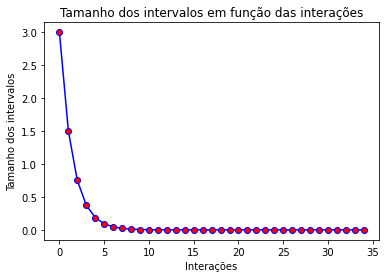

In [20]:
intervalos=bissecao_extremidades(np.cos,0,3)
ys=[]
ys=[abs(I[1]-I[0]) for I in intervalos]
plt.plot(ys, color = 'blue', marker='o', markerfacecolor='red' )
plt.ylabel('Tamanho dos intervalos')
plt.xlabel('Interações')
# Não apague a linha abaixo, ela faz os assert's dos gráficos darem certo
ax = plt.gca()
ax.set_title("Tamanho dos intervalos em função das interações")

In [21]:
assert len(ax.lines) == 1
assert len(ax.get_title()) >= 10

In [22]:
linha = ax.lines[0]
assert 5e-11 < min(linha.get_ydata()) < 2e-10
assert max(linha.get_ydata()) == 3

Agora, faça um gráfico com
- o comprimento dos intervalos
- a distância entre a extremidade inferior e a raiz correta
- a distância entre a extremidade superior e a raiz correta

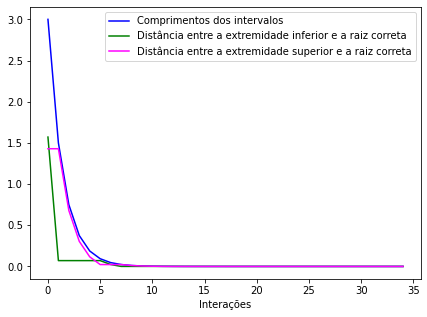

In [23]:
intervalos=bissecao_extremidades(np.cos,0,3)
r=bissecao(np.cos,0,3)[0]
plt.figure(figsize=(7,5))
y1=[abs(I[1]-I[0]) for I in intervalos]
y2=[abs(I[0]-r) for I in intervalos]
y3=[abs(I[1]-r) for I in intervalos]
plt.plot(y1, color = 'blue', marker='', markerfacecolor='red', label='Comprimentos dos intervalos' )
plt.plot(y2, color = 'green', marker='', markerfacecolor='red', label='Distância entre a extremidade inferior e a raiz correta')
plt.plot(y3, color = 'magenta', marker='', markerfacecolor='red', label='Distância entre a extremidade superior e a raiz correta')
plt.xlabel('Interações')
plt.legend()
ax = plt.gca()

In [24]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3

Repita o gráfico acima para o polinômio $f$ acima, com tolerância `1e-13`, tanto absoluta como relativa.

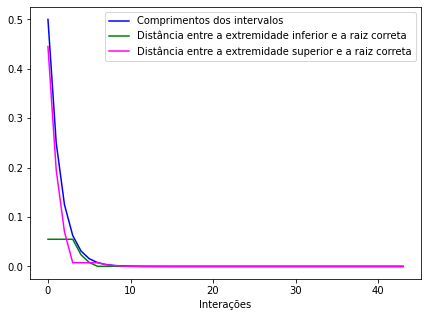

In [25]:
intervalos=bissecao_extremidades(f,-0.5,0,1e-13,1e-13)
r=bissecao(f,-0.5,0,1e-13,1e-13)[0]
plt.figure(figsize=(7,5))
y1=[abs(I[1]-I[0]) for I in intervalos]
y2=[abs(I[0]-r) for I in intervalos]
y3=[abs(I[1]-r) for I in intervalos]
plt.plot(y1, color = 'blue', marker='', markerfacecolor='red', label='Comprimentos dos intervalos' )
plt.plot(y2, color = 'green', marker='', markerfacecolor='red', label='Distância entre a extremidade inferior e a raiz correta')
plt.plot(y3, color = 'magenta', marker='', markerfacecolor='red', label='Distância entre a extremidade superior e a raiz correta')
plt.xlabel('Interações')
plt.legend()
ax = plt.gca()
ax = plt.gca()

In [26]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3

In [27]:
for l in ax.lines:
    assert 40 <= len(l.get_xdata()) <= 45

O que você observa de comum nos gráficos com relação aos erros entre as extremidades dos intervalos?

**Resposta**

_Ambos possuem uma taxa de decrescimento do tamanho do intervalo similar. Essa similaridade também ocorre na distância entre a extremidade superior e a raíz correta. Além disso, em ambos os casos, a partir da décima interação todas as distâncias analisadas se tornam iguais e constante. Logo, é possível que o método da bisseção encontre a raíz para essas duas funções com os números de interações bastante proximos._